# Equipo Imagine

- Alejandro Iram Ramírez Nava
- Carlos Emiliano Mendoza Hernández
- Vania Janet Raya Ríos

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Objetivo

En este ejercicio, aplicarán los conocimientos adquiridos en PySpark para realizar un análisis de datos sobre un dataset. Se enfocarán en la manipulación de DataFrames, la aplicación de transformaciones, y la realización de un análisis exploratorio de datos (EDA) para extraer insights significativos.

# Dataset

tilizaremos el dataset "Titanic", que contiene información sobre los pasajeros del Titanic, incluyendo si sobrevivieron o no, su edad, clase, género, entre otros.

### Configuracion de entorno

In [71]:
from pyspark.sql import SparkSession

# Crear una sesión de Spark
spark = SparkSession.builder.appName("pyspark_pt_2").getOrCreate()

# Cargar el dataset Titanic
df = spark.read.csv("train.csv", header=True, inferSchema=True)

### Exploracion inicial del dataset

In [72]:
# Mostrar las primeras filas
df.show(5)

# Obtener el esquema
df.printSchema()

# Contar el número de filas y columnas
print(f"Número de filas: {df.count()}")
print(f"Número de columnas: {len(df.columns)}")

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
+-----------+--------+------+--------------------+------+----+-----+-----+------

### Limpieza de datos

In [73]:
# Verificar valores nulos
from pyspark.sql.functions import col, isnan, when, count

df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

# Eliminar la columna 'Cabin'
df = df.drop('Cabin')

# Rellenar valores nulos en 'Age' con la mediana
median_age = df.approxQuantile("Age", [0.5], 0.01)[0]
df = df.na.fill(median_age, subset=["Age"])

+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|PassengerId|Survived|Pclass|Name|Sex|Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+
|          0|       0|     0|   0|  0|177|    0|    0|     0|   0|  687|       2|
+-----------+--------+------+----+---+---+-----+-----+------+----+-----+--------+



### Analisis Descriptivo



In [74]:
from pyspark.sql.functions import mean, stddev, col

# Estadísticas descriptivas de 'Age'
df.select(mean("Age").alias("Mean Age"), stddev("Age").alias("Std Dev Age")).show()

# Tasa de supervivencia por género
df.groupBy("Sex").agg(mean("Survived").alias("Survival Rate")).show()

# Tasa de supervivencia por clase
df.groupBy("Pclass").agg(mean("Survived").alias("Survival Rate")).show()

+-----------------+------------------+
|         Mean Age|       Std Dev Age|
+-----------------+------------------+
|29.36158249158249|13.019696550973201|
+-----------------+------------------+

+------+-------------------+
|   Sex|      Survival Rate|
+------+-------------------+
|female| 0.7420382165605095|
|  male|0.18890814558058924|
+------+-------------------+

+------+-------------------+
|Pclass|      Survival Rate|
+------+-------------------+
|     1| 0.6296296296296297|
|     3|0.24236252545824846|
|     2|0.47282608695652173|
+------+-------------------+



### Visualizacion de datos

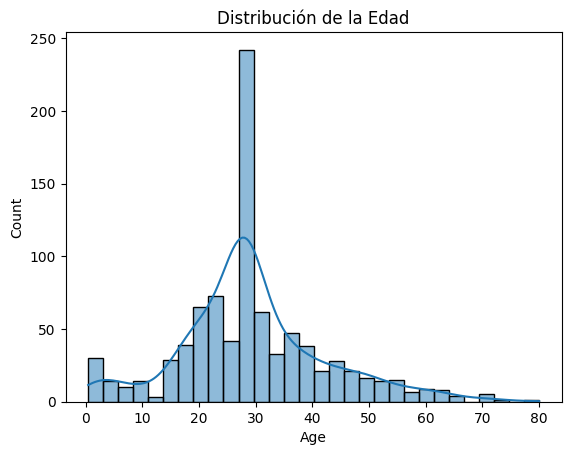

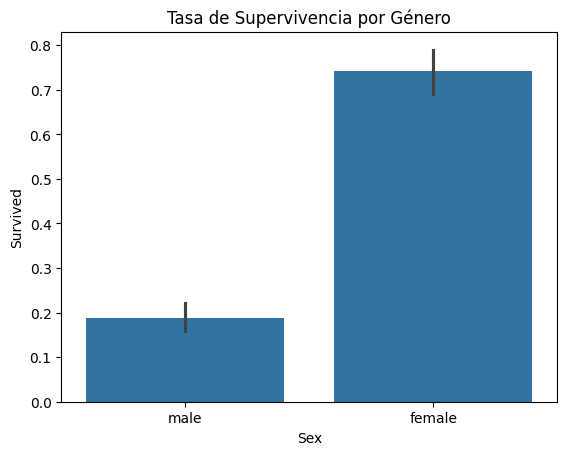

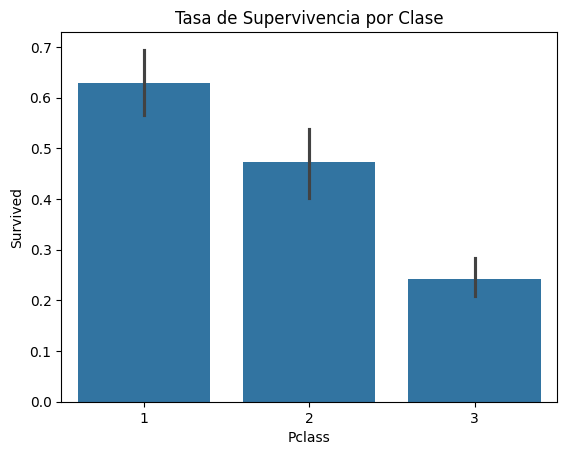

In [75]:
# Convertir el DataFrame de PySpark a Pandas para visualización
pd_df = df.toPandas()

# Distribución de la edad
sns.histplot(pd_df['Age'], kde=True)
plt.title('Distribución de la Edad')
plt.show()

# Tasa de supervivencia por género
sns.barplot(x='Sex', y='Survived', data=pd_df)
plt.title('Tasa de Supervivencia por Género')
plt.show()

# Tasa de supervivencia por clase
sns.barplot(x='Pclass', y='Survived', data=pd_df)
plt.title('Tasa de Supervivencia por Clase')
plt.show()

### En esta seccion agrega dos analisis extra sobre el dataset

In [76]:
pd_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"""Johnston, Miss. Catherine Helen """"Carrie""""""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Consulta de clases y sexo agrupados usando consultas SQL en PySpark.

In [77]:
df.createOrReplaceTempView('Titanic')
consulta = '''
  SELECT COUNT(Pclass) AS frecuencia, Pclass,sex
  FROM Titanic
  GROUP BY Pclass, sex

  '''
spark.sql(consulta).show()


+----------+------+------+
|frecuencia|Pclass|   sex|
+----------+------+------+
|        76|     2|female|
|       347|     3|  male|
|       122|     1|  male|
|       144|     3|female|
|        94|     1|female|
|       108|     2|  male|
+----------+------+------+



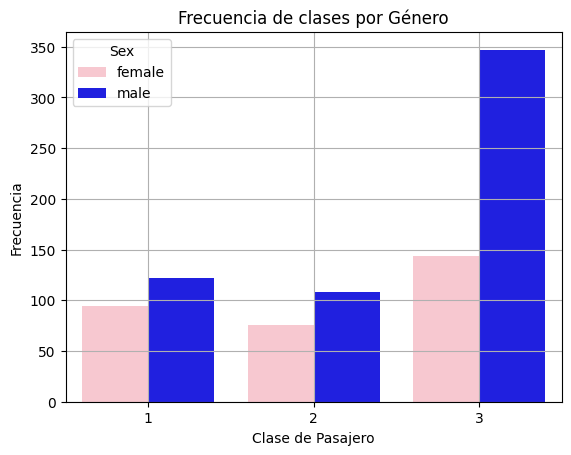

In [78]:
# Crear la gráfica de barras
sns.countplot(x='Pclass', hue='Sex', data=pd_df, palette={'male': 'blue', 'female': 'pink'})

# Añadir etiquetas y título
plt.xlabel('Clase de Pasajero')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de clases por Género')
plt.grid(True)

# Mostrar la gráfica
plt.show()

En general hay mas mujeres y hombres que compraron boletos en la tercera clase y por mucho, mas hombres en la tercera clase que en cualquier otra en el Titanic.

Otra cosa que se aprecia es que tanto mujeres como hombres compraron menos en la segunda clase.

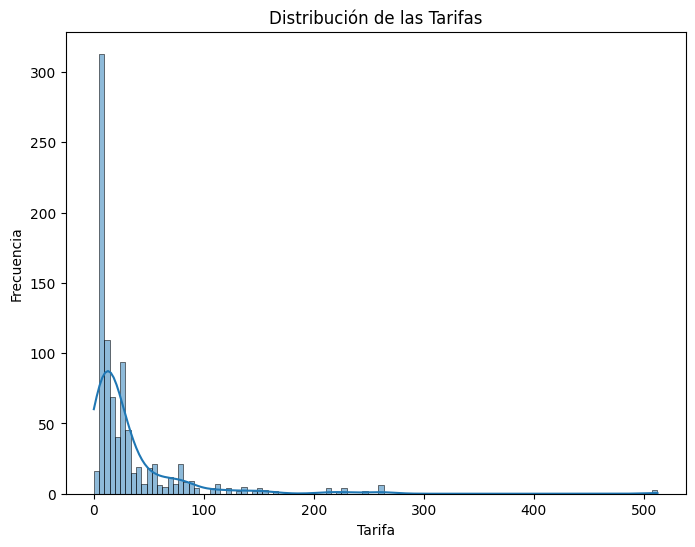

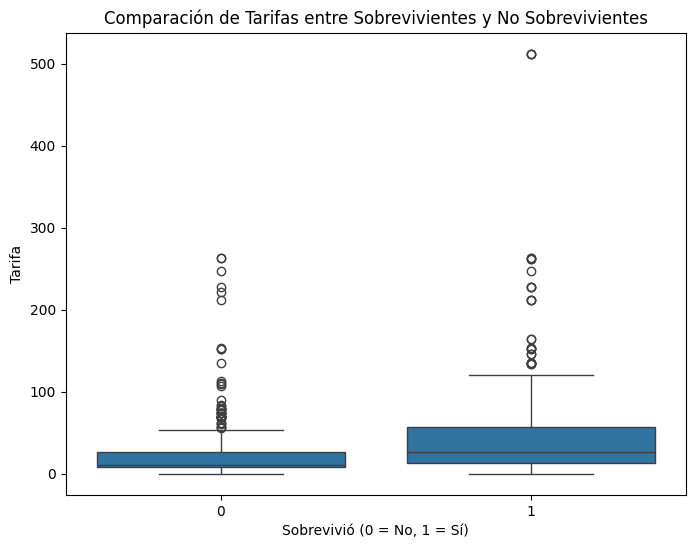

+------------------+------+--------+
|   Tarifa_Promedio|Pclass|Survived|
+------------------+------+--------+
| 64.68400750000002|     1|       0|
| 95.60802867647055|     1|       1|
|19.412327835051546|     2|       0|
|           22.0557|     2|       1|
| 13.66936424731183|     3|       0|
|13.694887394957966|     3|       1|
+------------------+------+--------+



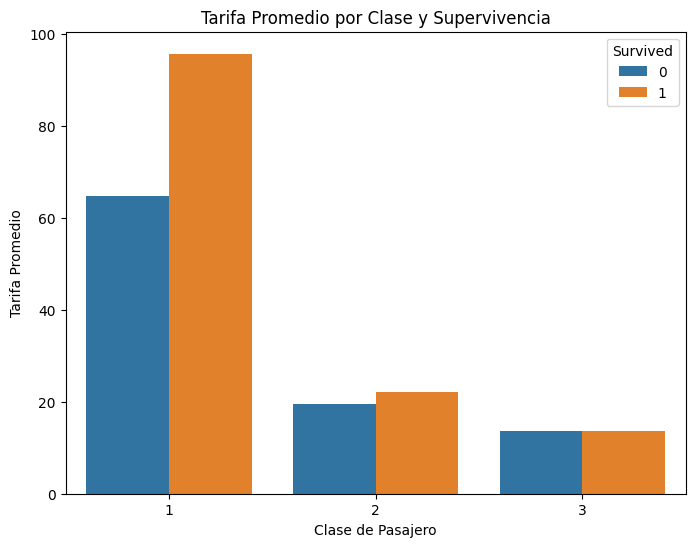

In [79]:
# 1. Crear un histograma de la distribución de las tarifas
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
sns.histplot(pd_df['Fare'], kde=True)
plt.title('Distribución de las Tarifas')
plt.xlabel('Tarifa')
plt.ylabel('Frecuencia')
plt.show()

# 2. Crear un boxplot para comparar las tarifas entre sobrevivientes y no sobrevivientes
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=pd_df)
plt.title('Comparación de Tarifas entre Sobrevivientes y No Sobrevivientes')
plt.xlabel('Sobrevivió (0 = No, 1 = Sí)')
plt.ylabel('Tarifa')
plt.show()

# 3. Calcular la tarifa promedio por clase y supervivencia
# Tasa de supervivencia por clase usando SQL en PySpark
df.createOrReplaceTempView('Titanic')
consulta = '''
  SELECT MEAN(Fare) AS Tarifa_Promedio, Pclass, Survived
  FROM Titanic
  GROUP BY Pclass, Survived
  ORDER BY Pclass, Survived
  '''
spark.sql(consulta).show()

# 4. Visualizar la tarifa promedio por clase y supervivencia (opcional)
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Fare', hue='Survived', data=fare_by_class_survival)
plt.title('Tarifa Promedio por Clase y Supervivencia')
plt.xlabel('Clase de Pasajero')
plt.ylabel('Tarifa Promedio')
plt.show()

De la primera grafica de frecuencias podemos ver que la gran mayoria pago una tarifa barata (esta sesgada a la derecha).

En el grafico de bigotes podemos observar que los que pagaron mas tarifa, sobrevivieron (nos damos cuenta de esto por el tamaño de la caja, el lugar de la media en comparacion con los que no sobrevivieron y los cuartiles).

Finalmente, en el ultimo grafico de barras podemos ver que los de primera clase sobrevivieron (aunque casi la mitad no, pero aun asi sigue siendo muchisimo mayor a los de segunda y tercera clase).

En resumen, los que pagaron una tarifa mas alta y estaban en la primera clase, tuvieron mas posibilidad de sobrevivir.

